<a href="https://colab.research.google.com/github/Hamza-benAmmar/Sentiment-analysis-/blob/main/Emotion_Classification_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from nltk.stem.porter import PorterStemmer
import nltk
import tensorflow as tf
nltk.download('stopwords')
nltk.download('punkt')
!pip install keras-tuner

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 13.8 MB/s eta 0:00:00


# **Data Classifier**

In [ ]:
data=pd.read_csv('/content/concatenated_data.csv')

In [ ]:
data=data.loc[:,['sentiment','content']]
copy=data.copy()
data['sentiment'].value_counts()

joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: sentiment, dtype: int64

In [ ]:
data.isnull().sum()

sentiment    0
content      0
dtype: int64

In [ ]:
data.duplicated().sum()

1

In [ ]:
index = data[data.duplicated() == True].index
data.drop(index, axis = 0, inplace = True)
data.reset_index(inplace=True, drop = True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data[data['content'].duplicated() == True]

,sentiment,content
5067,joy,i feel on the verge of tears from weariness i ...
6133,love,i still feel a craving for sweet food
6563,anger,i tend to stop breathing when i m feeling stre...
7623,sadness,i was intensely conscious of how much cash i h...
7685,surprise,im still not sure why reilly feels the need to...
8246,love,i am not amazing or great at photography but i...
9596,joy,ive also made it with both sugar measurements ...
9687,joy,i had to choose the sleek and smoother feel of...
9769,sadness,i often find myself feeling assaulted by a mul...
9786,joy,i feel im being generous with that statement


In [ ]:
index = data[data['content'].duplicated() == True].index
data.drop(index, axis = 0, inplace = True)
data.reset_index(inplace=True, drop = True)

# **Data Cleaning and Preprocessing**

In [ ]:
stop_words=stopwords.words("english")
from nltk.stem import WordNetLemmatizer

def lemmatization(text):
    lemmatizer= WordNetLemmatizer()

    text = text.split()

    text=[lemmatizer.lemmatize(y) for y in text]

    return " " .join(text)

def remove_stop_words(text):

    Text=[i for i in str(text).split() if i not in stop_words]
    return " ".join(Text)

def Removing_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

def lower_case(text):

    text = text.split()

    text=[y.lower() for y in text]

    return " " .join(text)

def Removing_punctuations(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('؛',"", )

    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()

def Removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_small_sentences(df):
    for i in range(len(df)):
        if len(df.text.iloc[i].split()) < 3:
            df.text.iloc[i] = np.nan

def normalize_text(data):
    data["content"]=data["content"].apply(lambda text : Removing_urls(text))
    data["content"]=data["content"].apply(lambda text : lower_case(text))
    data["content"]=data["content"].apply(lambda text : remove_stop_words(text))
    data["content"]=data["content"].apply(lambda text : Removing_numbers(text))
    data["content"]=data["content"].apply(lambda text : Removing_punctuations(text))
    data["content"]=data["content"].apply(lambda text : lemmatization(text))
    return data


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
data=normalize_text(data)

In [ ]:
data.tail()

,sentiment,content
19943,anger,keep feeling like someone unkind wrong think g...
19944,anger,im feeling little cranky negative doctor appoi...
19945,joy,feel useful people give great feeling achievement
19946,joy,im feeling comfortable derby feel though start...
19947,fear,feel weird meet w people text like dont talk f...


In [ ]:
data['sentiment'].value_counts()

joy         6739
sadness     5793
anger       2703
fear        2369
love        1630
surprise     714
Name: sentiment, dtype: int64

# **LABEL ENCODING**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['sentiment_label']=le.fit_transform(data['sentiment'])
data['sentiment_label'].value_counts()

2    6739
4    5793
0    2703
1    2369
3    1630
5     714
Name: sentiment_label, dtype: int64

In [ ]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['sentiment_label']=le.fit_transform(data['sentiment'])
data['sentiment_label'].value_counts()

2    6739
4    5793
0    2703
1    2369
3    1630
5     714
Name: sentiment_label, dtype: int64

In [ ]:
max_length = 0
for sentence in data['content']:
    length = len(sentence.split())
    if length > max_length:
        max_length = length
max_length

35

# **Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X=data['content']
y=data['sentiment_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y,random_state=42)

# **Feauture Engineering**

In [ ]:
from keras.preprocessing.text import one_hot, Tokenizer
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)
X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
maxlen = 35
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
X_train.shape

(16955, 35)

In [ ]:
vocab_length = len(word_tokenizer.word_index) + 1
vocab_length


13785

In [ ]:
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/content/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    try:
      vector_dimensions = asarray(records[1:], dtype='float32')
      embeddings_dictionary[word] = vector_dimensions
    except ValueError:
      pass

glove_file.close()

In [ ]:
embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    try:
      if embedding_vector is not None:
          embedding_matrix[index] = embedding_vector
    except ValueError:
      print(embedding_vector,word,index)
      pass


In [ ]:
embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    try:
      if embedding_vector is not None:
          embedding_matrix[index] = embedding_vector
    except ValueError:
      print(embedding_vector,word,index)
      pass

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding,Flatten,Dense,LSTM,Lambda
from keras.utils import to_categorical
from keras.layers import Bidirectional, Dropout
from keras import regularizers

y_one_hot = to_categorical(y_train, num_classes=6)
y_one_hot


array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
y_one_hot

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

# **Model Building Phase**

In [ ]:

[ ]
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from nltk.stem.porter import PorterStemmer
import nltk
import tensorflow as tf
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Embedding(vocab_length, 100, input_length=X_train.shape[1], weights=[embedding_matrix], trainable=False))
model.add(Bidirectional(LSTM(256, dropout=0.2,recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(128, dropout=0.2,recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(128, dropout=0.2,recurrent_dropout=0.2)))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.005), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 35, 100)           1378500   
                                                                 
 bidirectional (Bidirectiona  (None, 35, 512)          731136    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 35, 256)          656384    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 6)                 1542      
                                                        

In [ ]:

history = model.fit(X_train,
                    y_one_hot,
                    validation_split=0.2,
                    verbose=1,
                    batch_size=256,
                    epochs=6
                   )

Epoch 1/6
53/53 [==============================] - 90s 1s/step - loss: 1.4068 - accuracy: 0.4569 - val_loss: 1.0831 - val_accuracy: 0.5930
Epoch 2/6
53/53 [==============================] - 49s 928ms/step - loss: 0.8741 - accuracy: 0.6837 - val_loss: 0.6190 - val_accuracy: 0.7806
Epoch 3/6
53/53 [==============================] - 50s 944ms/step - loss: 0.5342 - accuracy: 0.8105 - val_loss: 0.3805 - val_accuracy: 0.8673
Epoch 4/6
53/53 [==============================] - 50s 946ms/step - loss: 0.3651 - accuracy: 0.8645 - val_loss: 0.3065 - val_accuracy: 0.8809
Epoch 5/6
53/53 [==============================] - 49s 930ms/step - loss: 0.2836 - accuracy: 0.8895 - val_loss: 0.2790 - val_accuracy: 0.8873
Epoch 6/6
53/53 [==============================] - 51s 965ms/step - loss: 0.2415 - accuracy: 0.9005 - val_loss: 0.2868 - val_accuracy: 0.8853


In [ ]:
import numpy as np
y_train = np.array(y_train)

In [ ]:
[ ]
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from nltk.stem.porter import PorterStemmer
import nltk
import tensorflow as tf
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
y_train

array([2, 4, 2, ..., 4, 2, 4])

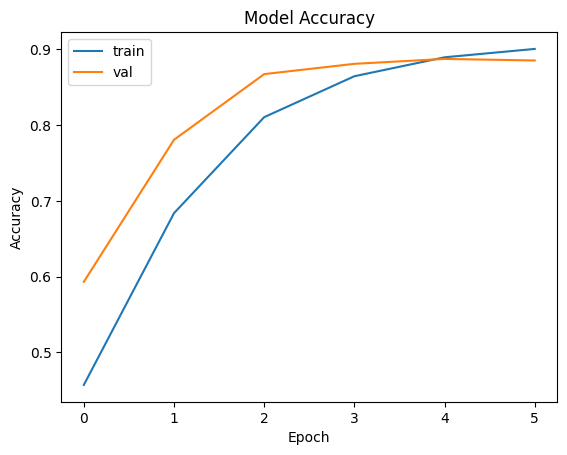

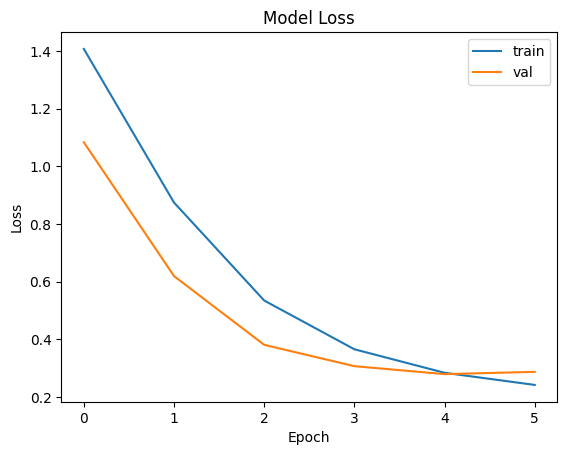

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')
plt.show()


# **Prediction**

In [ ]:
from sklearn.metrics import accuracy_score

y_pred=model.predict(X_test)

y_pred

94/94 [==============================] - 8s 75ms/step


array([[9.9042726e-01, 9.8758063e-04, 1.2852288e-03, 5.6297111e-04,
        6.6321180e-03, 1.0488596e-04],
       [9.9848038e-01, 3.8243877e-04, 6.0870439e-05, 9.2431554e-05,
        9.5953885e-04, 2.4394069e-05],
       [1.1726024e-04, 1.9169831e-05, 9.9950540e-01, 1.6953261e-04,
        1.1010875e-04, 7.8482975e-05],
       ...,
       [3.8850296e-03, 3.3209950e-04, 1.1276645e-03, 1.0197958e-03,
        9.9343240e-01, 2.0296287e-04],
       [1.7166154e-04, 5.1254014e-05, 9.9927253e-01, 1.8248495e-04,
        1.9478308e-04, 1.2732226e-04],
       [9.0549028e-01, 2.8500969e-03, 4.8618689e-03, 3.5472056e-03,
        8.2557432e-02, 6.9302146e-04]], dtype=float32)

In [ ]:
y_pred = [list(i).index(max(i)) for i in y_pred]

In [ ]:
type(y_pred)

list

In [ ]:
y_list=list(y_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.8760441029067825


# **Classification Metrics**

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80       406
           1       0.83      0.94      0.88       355
           2       0.89      0.95      0.92      1011
           3       0.93      0.62      0.74       245
           4       0.86      0.93      0.90       869
           5       0.97      0.66      0.79       107

    accuracy                           0.88      2993
   macro avg       0.89      0.81      0.84      2993
weighted avg       0.88      0.88      0.87      2993



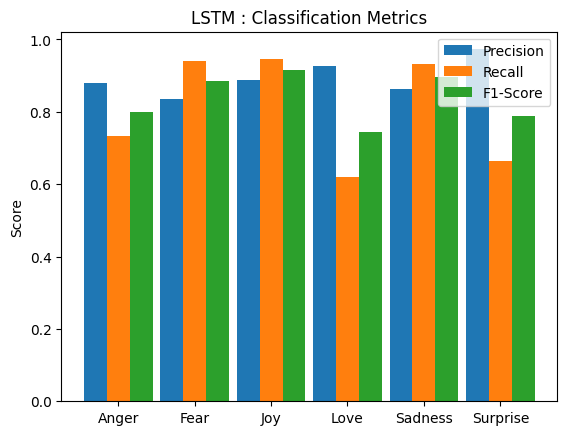

In [ ]:
# Generate classification report

# Extract precision, recall, and F1-score from the report
classes = list(report.keys())[:-3]
custom_labels = ['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise']
precision = [report[class_name]['precision'] for class_name in classes]
recall = [report[class_name]['recall'] for class_name in classes]
f1_score = [report[class_name]['f1-score'] for class_name in classes]

# Plotting the results
x = np.arange(len(classes))
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

ax.set_ylabel('Score')
ax.set_title('LSTM : Classification Metrics')
ax.set_xticks(x)
ax.set_xticklabels(custom_labels)
ax.legend()

plt.show()


# **Test**

In [ ]:
def normalized_sentence(sentence):
    sentence= lower_case(sentence)
    sentence= remove_stop_words(sentence)
    sentence= Removing_numbers(sentence)
    sentence= Removing_punctuations(sentence)
    sentence= Removing_urls(sentence)
    sentence= lemmatization(sentence)
    return sentence

In [ ]:
sentences = [
            "i'm really scared",
            "oh congratulations !",
            "I can't do it, I'm not ready to lose anything, just leave me alone",
            "i am really sad"
            ]
for sentence in sentences:
    print(sentence)
    sentence = normalized_sentence(sentence)
    sentence = word_tokenizer.texts_to_sequences([sentence])
    sentence = pad_sequences(sentence, maxlen=35, truncating='pre')
    result = le.inverse_transform(np.argmax(model.predict(sentence), axis=-1))[0]
    proba =  np.max(model.predict(sentence))
    print(f"{result} : {proba}\n\n")

i'm really scared
1/1 [==============================] - 0s 147ms/step
sadness : 0.3499298393726349


oh congratulations !
1/1 [==============================] - 0s 144ms/step
anger : 0.3795587420463562


I can't do it, I'm not ready to lose anything, just leave me alone
1/1 [==============================] - 0s 154ms/step
fear : 0.3098253607749939


i am really sad
1/1 [==============================] - 0s 192ms/step
anger : 0.35072028636932373


